(1, 10304)
(112, 92)
0.8980392 0.07450981


Text(0.5, 1.0, 'user number: 15')

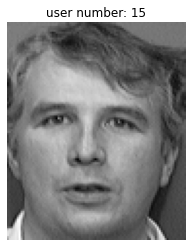

In [1]:
import matplotlib.image as mimg
from sklearn import svm,metrics,tree,ensemble
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 

# for single image 
user = 15
sample = 5
path = './orl_faces/u(%d)/%d.png'%(user,sample)

im = mimg.imread(path)
# need to convert this 2-D data into 1-D so, that it can be processed in ML classification algo.
feat = im.reshape(1,-1)
print(feat.shape)

print(im.shape)
print(im.max(),im.min()) # 0-255 

# disply the image 
plt.figure(1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('user number: '+str(user))

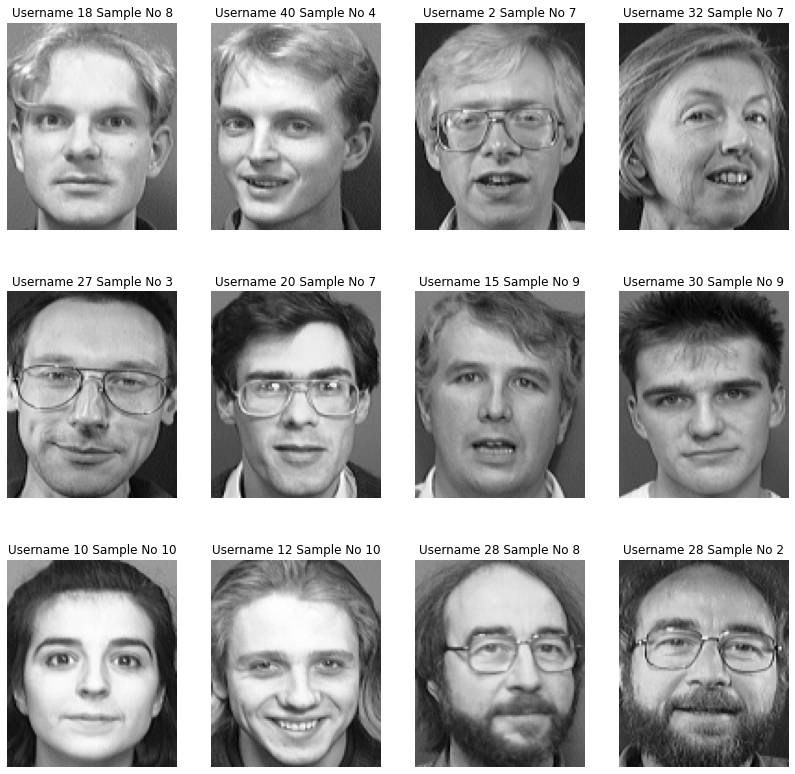

In [2]:
# display of the database 
for i in range(12):
    username = np.random.randint(1,41)
    sample = np.random.randint(1,11)
    path = "./orl_faces/u(%d)/%d.png"%(username,sample)
    
    im = mimg.imread(path)
    plt.figure(1,figsize=(14,14))
    plt.subplot(3,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    plt.title('Username '+str(username) +' Sample No '+str(sample))

In [3]:
# all samples 

X = np.zeros((400,112*92))
y = np.zeros((400))
count=0
for i in range(1,41,1): # users 
    for j in range(1,11): # samples
        user = i
        sample = j
        path = './orl_faces/u(%d)/%d.png'%(user,sample)

        im = mimg.imread(path)
        feat = im.reshape(1,112*92) # converting the 2D into 1-D 
        X[count, :] = feat
        y[count] = i # it keeps the track of the user number 
        count = count+1 # this counter will change the index of the database 
        print('user number: ',user,', sample number: ',sample)



        

user number:  1 , sample number:  1
user number:  1 , sample number:  2
user number:  1 , sample number:  3
user number:  1 , sample number:  4
user number:  1 , sample number:  5
user number:  1 , sample number:  6
user number:  1 , sample number:  7
user number:  1 , sample number:  8
user number:  1 , sample number:  9
user number:  1 , sample number:  10
user number:  2 , sample number:  1
user number:  2 , sample number:  2
user number:  2 , sample number:  3
user number:  2 , sample number:  4
user number:  2 , sample number:  5
user number:  2 , sample number:  6
user number:  2 , sample number:  7
user number:  2 , sample number:  8
user number:  2 , sample number:  9
user number:  2 , sample number:  10
user number:  3 , sample number:  1
user number:  3 , sample number:  2
user number:  3 , sample number:  3
user number:  3 , sample number:  4
user number:  3 , sample number:  5
user number:  3 , sample number:  6
user number:  3 , sample number:  7
user number:  3 , sample n

user number:  27 , sample number:  9
user number:  27 , sample number:  10
user number:  28 , sample number:  1
user number:  28 , sample number:  2
user number:  28 , sample number:  3
user number:  28 , sample number:  4
user number:  28 , sample number:  5
user number:  28 , sample number:  6
user number:  28 , sample number:  7
user number:  28 , sample number:  8
user number:  28 , sample number:  9
user number:  28 , sample number:  10
user number:  29 , sample number:  1
user number:  29 , sample number:  2
user number:  29 , sample number:  3
user number:  29 , sample number:  4
user number:  29 , sample number:  5
user number:  29 , sample number:  6
user number:  29 , sample number:  7
user number:  29 , sample number:  8
user number:  29 , sample number:  9
user number:  29 , sample number:  10
user number:  30 , sample number:  1
user number:  30 , sample number:  2
user number:  30 , sample number:  3
user number:  30 , sample number:  4
user number:  30 , sample number:  

In [4]:
# SVM with best kernel function 

import pandas as pd
test_ratio=[0.5,0.3,0.2]
kernel=['rbf','poly','linear']
result=np.zeros([len(test_ratio),len(kernel)])
for i in range(len(test_ratio)):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=test_ratio[i],random_state=2)
    for j in range(len(kernel)):
        svmModel = svm.SVC(kernel =kernel[j] ,degree=3, max_iter=3000,decision_function_shape='ovr',C=1,gamma='scale')
        svmModel = svmModel.fit(X_train,y_train)
        y_pred = svmModel.predict(X_test)
        acc=metrics.accuracy_score(y_pred,y_test)
        result[i,j] =acc

In [5]:
resultFrame = pd.DataFrame(result,columns=kernel,index=test_ratio)
print(resultFrame)

          rbf      poly    linear
0.5  0.700000  0.930000  0.925000
0.3  0.891667  0.966667  0.966667
0.2  0.937500  0.975000  0.975000


##The kernel 'poly' is giving the best accuracy with all the test ratio

In [6]:
# DT with Training and testing accuracy  

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2)

dtModel = tree.DecisionTreeClassifier(criterion='gini',random_state=10)

dtModel = dtModel.fit(X_train,y_train)
optrain = dtModel.predict(X_train)
optest = dtModel.predict(X_test)

acc_train = metrics.accuracy_score(optrain,y_train)
acc_test=metrics.accuracy_score(optest,y_test)

print("Training accuracy with Decision Tree: ",acc_train)
print("Testing accuracy with Decision Tree: ",acc_test)


Training accuracy with Decision Tree:  1.0
Testing accuracy with Decision Tree:  0.425


In [7]:
# RF with training and testing accuracy 

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

rfModel = ensemble.RandomForestClassifier(n_estimators=500,criterion='gini',random_state=10)

rfModel = rfModel.fit(X_train,y_train)
optrain = rfModel.predict(X_train)
optest = rfModel.predict(X_test)

acc_train = metrics.accuracy_score(optrain,y_train)
acc_test=metrics.accuracy_score(optest,y_test)

print("Training accuracy with Random Forest: ",acc_train)
print("Testing accuracy with Random Forest: ",acc_test)

Training accuracy with Random Forest:  1.0
Testing accuracy with Random Forest:  0.9625


        SVM        DT        RF
0.5  0.9300  0.435000  0.885000
0.3  0.9750  0.566667  0.958333
0.2  0.9875  0.612500  0.962500


<AxesSubplot:>

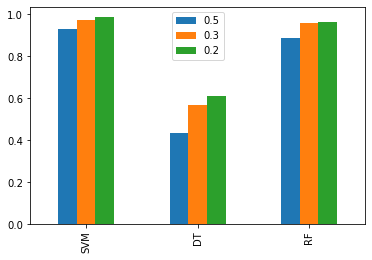

In [8]:
# bar chart for Decision Tree vs Random Forest vs SVM 


test_ratio=[0.5,0.3,0.2]
classifier=['SVM','DT','RF']

result=np.zeros([len(test_ratio),3])

for i in range(len(test_ratio)):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_ratio[i],random_state=10)
   

    svmModel = svm.SVC(kernel ='linear' ,degree=3, max_iter=3000,decision_function_shape='ovr',C=1,gamma='scale')
    dtModel = tree.DecisionTreeClassifier(criterion='gini',random_state=10)
    rfModel = ensemble.RandomForestClassifier(n_estimators=500,criterion='gini',random_state=10)

    svmModel = svmModel.fit(X_train,y_train)
    y_pred = svmModel.predict(X_test)
    result[i,0]=metrics.accuracy_score(y_pred,y_test) #testing accuracy with SVM


    dtModel = dtModel.fit(X_train,y_train)
    optrainDT = dtModel.predict(X_train)
    optestDT = dtModel.predict(X_test)
    

    result[i,1] = metrics.accuracy_score(optestDT,y_test) #testing accuracy with Decision tree

    
    rfModel = rfModel.fit(X_train,y_train)
    optrainRF = rfModel.predict(X_train)
    optestRF = rfModel.predict(X_test)

    
    result[i,2]= metrics.accuracy_score(optestRF,y_test) #training accuracy with Random Forest
    
    
resultFrame = pd.DataFrame(result,columns=classifier,index=test_ratio)
print(resultFrame)
resultFrame.T.plot(kind='bar')